In [41]:
#@title Import modules
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [42]:
# Import the dataset.
train_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")


In [43]:
scale_factor = 1000.0

# Scale the training set's label.
train_df["median_house_value"] /= scale_factor 

# Scale the test set's label
test_df["median_house_value"] /= scale_factor

In [44]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model               


def train_model(model, df, feature, label, my_epochs, 
                my_batch_size=None, my_validation_split=0.1):
  """Feed a dataset into the model in order to train it."""

  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=my_batch_size,
                      epochs=my_epochs,
                      validation_split=my_validation_split)

  # Gather the model's trained weight and bias.
  trained_weight = model.get_weights()[0][0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Isolate the root mean squared error for each epoch.
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse, history.history   

print("Defined the build_model and train_model functions.")

Defined the build_model and train_model functions.


In [45]:
#@title Define the plotting function

def plot_the_loss_curve(epochs, mae_training, mae_validation):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs[1:], mae_training[1:], label="Training Loss")
  plt.plot(epochs[1:], mae_validation[1:], label="Validation Loss")
  plt.legend()
  
  # We're not going to plot the first epoch, since the loss on the first epoch
  # is often substantially greater than the loss for other epochs.
  merged_mae_lists = mae_training[1:] + mae_validation[1:]
  highest_loss = max(merged_mae_lists)
  lowest_loss = min(merged_mae_lists)
  delta = highest_loss - lowest_loss
  print(delta)

  top_of_y_axis = highest_loss + (delta * 0.05)
  bottom_of_y_axis = lowest_loss - (delta * 0.05)
   
  plt.ylim([bottom_of_y_axis, top_of_y_axis])
  plt.show()  

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


In [46]:
def predict_house_values(n, feature, label):
  """Predict house values based on a feature."""

  batch = training_df[feature][10000:10000 + n]
  predicted_values = my_model.predict_on_batch(x=batch)

  print("feature   label          predicted")
  print("  value   value          value")
  print("          in thousand$   in thousand$")
  print("--------------------------------------")
  for i in range(n):
    print ("%5.0f %6.0f %15.0f" % (training_df[feature][10000 + i],
                                   training_df[label][10000 + i],
                                   predicted_values[i][0] ))

Epoch 1/30


C:\Users\Aiden\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 47651.6055 - root_mean_squared_error: 218.1835 - val_loss: 33780.7266 - val_root_mean_squared_error: 183.7953
Epoch 2/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - loss: 28659.2363 - root_mean_squared_error: 169.1437 - val_loss: 18809.9609 - val_root_mean_squared_error: 137.1494
Epoch 3/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - loss: 15692.5605 - root_mean_squared_error: 125.1453 - val_loss: 10031.9873 - val_root_mean_squared_error: 100.1598
Epoch 4/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - loss: 8558.2393 - root_mean_squared_error: 92.4753 - val_loss: 7091.6104 - val_root_mean_squared_error: 84.2117
Epoch 5/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - loss: 7071.8633 - root_mean_squared_error: 84.0861 - val_loss: 7005.4502 - val_root_mean_squared_error: 83.6986
Epoch 6/30
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - loss: 6878.3022 - root_mean_squared_error: 82.9241 - val_loss: 7008.9077 - val_root_mean_squared_error: 8

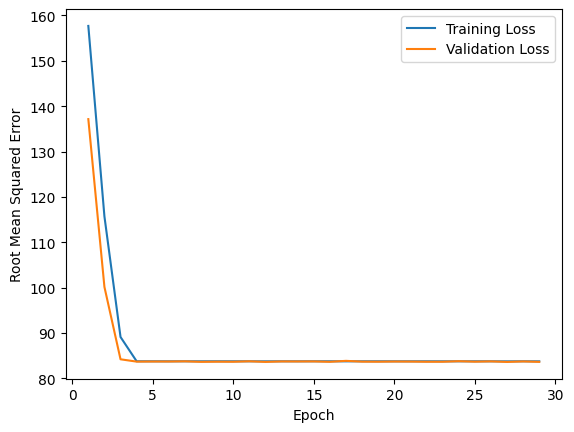

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - loss: 6581.5850 - root_mean_squared_error: 81.0770


In [47]:
# The following variables are the hyperparameters.
learning_rate = 0.08
epochs = 30
batch_size = 100

# Split the original training set into a reduced training set and a
# validation set. 
validation_split = 0.2

# Identify the feature and the label.
my_feature = "median_income"    # the median income on a specific city block.
my_label = "median_house_value" # the median house value on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on the neighborhood's median income.  
shuffled_train_df = train_df.reindex(np.random.permutation(train_df.index))
# Invoke the functions to build and train the model.
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, shuffled_train_df, my_feature, 
                                    my_label, epochs, batch_size, 
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])

x_test = test_df[my_feature]
y_test = test_df[my_label]

results = my_model.evaluate(x_test, y_test, batch_size=batch_size)